In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
import ast
from collections import Counter


def get_data_from_mongodb():
    try:
        client = MongoClient("mongodb://localhost:27017/")
        db = client["local"]
        collection = db["MovieShow"]
        data = list(collection.find())
        df = pd.DataFrame(data)
        if '_id' in df.columns:
            df.drop(columns=['_id'], inplace=True)
        return df
    except Exception as e:
        print(f"Gagal mengambil data dari MongoDB: {e}")
        return pd.DataFrame()
    finally:
        if client:
            client.close()

df = df = get_data_from_mongodb()


In [2]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

plt.figure(figsize=(10,6))
plt.hist(df['release_year'].dropna(), bins=range(int(df['release_year'].min()), int(df['release_year'].max()) + 1), color='lightgreen', edgecolor='black')
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Acara')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


KeyError: 'release_date'

### Distribusi Tahun Rilis
Visualisasi ini menunjukkan jumlah tayangan yang dirilis setiap tahunnya. Dengan melihat distribusi ini, kita dapat mengidentifikasi tren produksi dari tahun ke tahun. Jika terdapat peningkatan signifikan, hal ini dapat menunjukkan pertumbuhan industri atau platform tertentu. Sebaliknya, penurunan jumlah rilis bisa menjadi indikator adanya kendala produksi atau perubahan strategi distribusi.


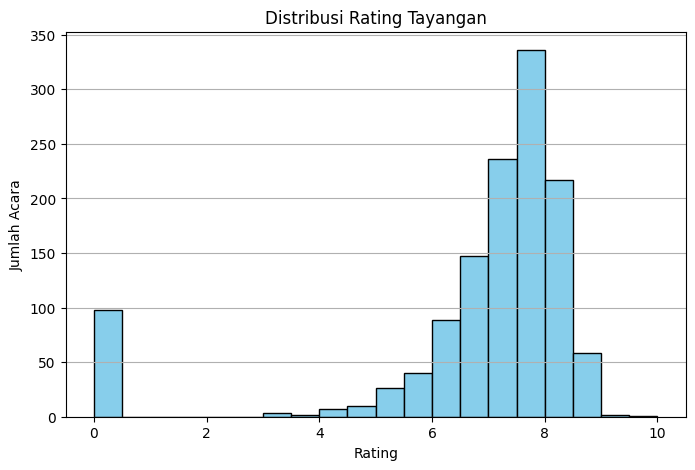

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Tayangan')
plt.xlabel('Rating')
plt.ylabel('Jumlah Acara')
plt.grid(axis='y')
plt.show()

### Distribusi Rating Tayangan
Histogram ini menggambarkan bagaimana distribusi rating dari semua tayangan. Dari visualisasi ini, kita bisa melihat apakah kebanyakan tayangan memiliki rating yang tinggi atau rendah. Pola distribusi ini penting untuk mengevaluasi kualitas keseluruhan dari konten yang tersedia.


In [ ]:
def parse_genre(g):
    if pd.isna(g):
        return []
    
    g = g.strip()
    
    # Kalau formatnya seperti list Python
    if g.startswith('[') and g.endswith(']'):
        try:
            val = ast.literal_eval(g)
            if isinstance(val, list):
                return [genre.strip() for genre in val]
        except:
            return []

    # Formatnya string biasa "Comedy, Action"
    return [genre.strip() for genre in g.split(',')]

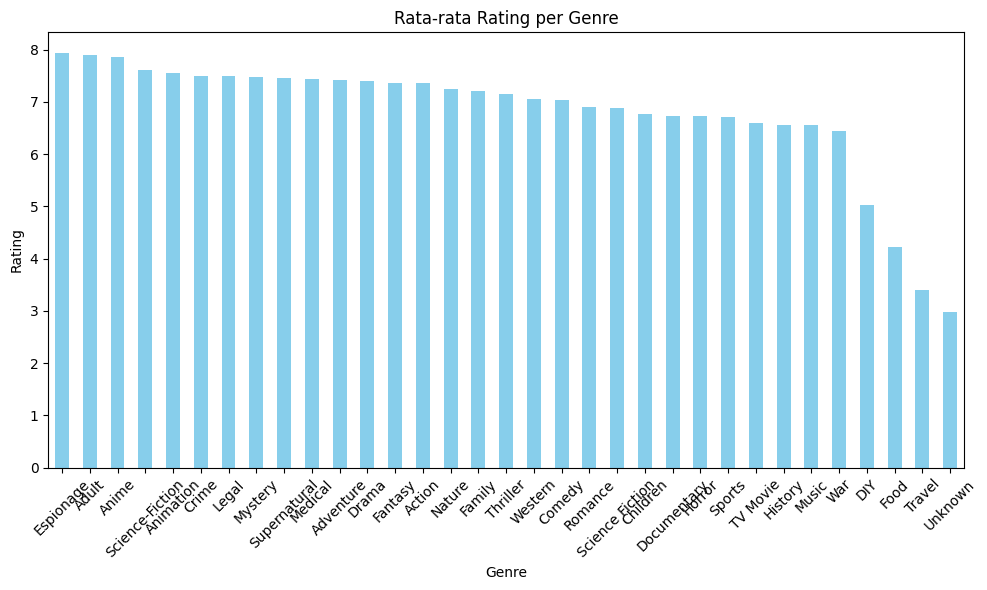

In [ ]:
df['genres_split'] = df['genres'].apply(parse_genre)
df_exploded = df.explode('genres_split').rename(columns={'genres_split': 'genre'})
df_exploded = df_exploded.dropna(subset=['genre'])  # Hapus genre yang kosong


# Rata-rata rating
genre_avg = df_exploded.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
genre_avg.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Rating per Genre')
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Rata-rata Rating per Genre
Grafik ini menampilkan rata-rata rating untuk tiap genre tayangan. Tujuannya adalah untuk mengetahui genre mana yang paling disukai oleh penonton berdasarkan rating. Genre dengan rating tinggi bisa dijadikan acuan untuk produksi konten baru yang berkualitas dan sesuai minat audiens.


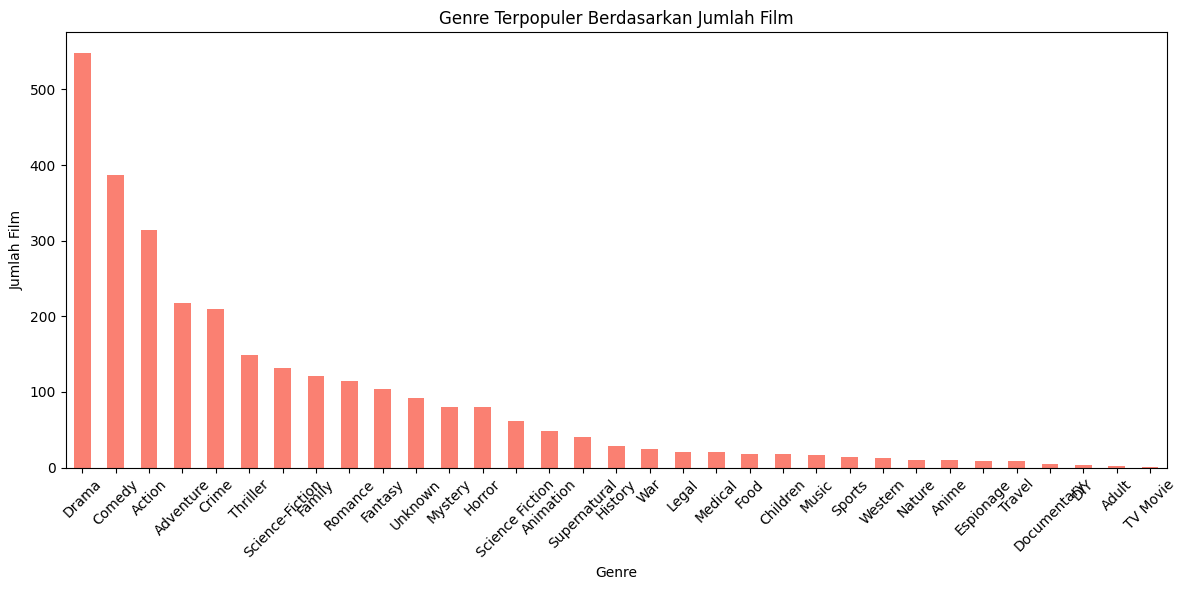

In [ ]:
genre_counts = df_exploded['genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='salmon')
plt.title('Genre Terpopuler Berdasarkan Jumlah Film')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Genre Terpopuler Berdasarkan Jumlah Film
Bar chart ini menunjukkan jumlah film dalam setiap genre. Genre yang paling sering muncul bisa menunjukkan tren atau preferensi umum dalam industri. Namun, tingginya jumlah tidak selalu berarti kualitas, sehingga perlu dibandingkan dengan data rating.


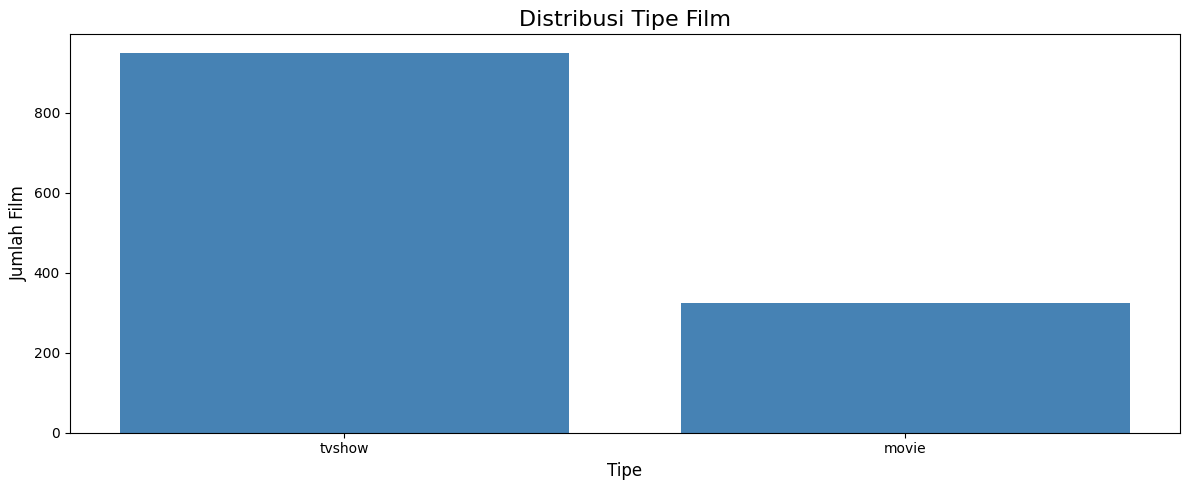

In [ ]:
type_counts = df['type'].value_counts()

# Plot dengan plt
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(type_counts.index, type_counts.values, color='steelblue')  # Sesuaikan warna dengan 'Blues_d'
ax.set_title('Distribusi Tipe Film', fontsize=16)
ax.set_xlabel('Tipe', fontsize=12)
ax.set_ylabel('Jumlah Film', fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()



### Distribusi Tipe Film
Visualisasi ini menunjukkan jumlah tayangan berdasarkan tipe, seperti film atau serial. Dengan mengetahui tipe mana yang lebih banyak, kita bisa memahami fokus konten dari platform atau produsen data.
